In [2]:
import pandas as pd # type: ignore
import numpy as np #type: ignore
import doubleml as dml # type: ignore

import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

from sklearn.linear_model import LassoCV, LogisticRegressionCV # type: ignore
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor # type: ignore
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore
from sklearn.pipeline import make_pipeline # type: ignore

from xgboost import XGBClassifier, XGBRegressor # type: ignore

import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

from sklearn.model_selection import train_test_split # type: ignore
from sklearn.metrics import mean_squared_error # type: ignore

import warnings
warnings.simplefilter('ignore', category=UserWarning)


In [3]:
pd.options.display.float_format = '{:.6f}'.format

In [4]:
df = pd.read_csv("small_steps_ar.csv")
df = df.dropna()

monthD = pd.get_dummies(df['month'], prefix='month', drop_first=False)
zipcodeD = pd.get_dummies(df['zipcode'], prefix='zipcode', drop_first=False)
mozipD = pd.get_dummies(df['mozip'], prefix='mozip', drop_first=False)

In [5]:
income = [0] * len(df)
for i in range(0, len(df)): 
    if df["income2"].iloc[i] ==1: 
        income[i] = 10
    elif df["income3"].iloc[i] ==1: 
        income[i] = 25
    elif df["income4"].iloc[i] ==1: 
        income[i] = 35
    elif df["income5"].iloc[i] ==1: 
        income[i] = 45
    elif df["income6"].iloc[i] ==1: 
        income[i] = 65
    elif df["income7"].iloc[i] ==1: 
        income[i] = 85
    elif df["income8"].iloc[i] ==1: 
        income[i] = 115
    elif df["income9"].iloc[i] ==1: 
        income[i] = 135


In [6]:
df['incomes'] = income

In [7]:
reported_income = df[df["incomes"]!= 0]
no_reported_income = df[df["incomes"]== 0]

In [8]:
y = reported_income['incomes']
X = reported_income[[ 'zipcode', 'lusage', 'children', 'hhsize2', 'hhsize3', 'hhsize4', 'hhsize5','hhsize5plus', 'owner']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# num=2
# mselist = []
# numlist=[]
# avg_leaf_nodes =[]
# while num <100: 
#     rf_reg = RandomForestRegressor(n_estimators=num, random_state=42)
#     rf_reg.fit(X_train, y_train)
#     y_pred = rf_reg.predict(X_test)
#     mse = mean_squared_error(y_test, y_pred)
#     numlist.append(num)
#     mselist.append(mse)
#     leaf_counts = [tree.tree_.n_leaves for tree in rf_reg.estimators_]
#     total_leaves = sum(leaf_counts)
#     average_leaves = sum(leaf_counts) / len(leaf_counts)
#     avg_leaf_nodes.append(average_leaves)
#     num +=1

In [9]:
# plt.figure(figsize=(8, 6))
# plt.title("MSE Score")
# plt.plot(numlist, mselist, color='b')
# plt.ylabel("MSE")
# plt.xlabel("n_estimators")
# plt.show()

# print(f"Minimum MSE: {np.min(mselist)} at this number of trees: {numlist[mselist.index(np.min(mselist))]}")

In [10]:
rf_reg = RandomForestRegressor(n_estimators=99, random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=99, random_state=42)

In [11]:
X_fix = no_reported_income[[ 'zipcode', 'lusage', 'children', 'hhsize2', 'hhsize3', 'hhsize4', 'hhsize5','hhsize5plus', 'owner']]
y_pred = rf_reg.predict(X_fix)
print(y_pred)


[38.23232323 44.39393939 67.72727273 ... 39.6969697  65.15151515
 31.56565657]


In [ ]:
no_reported_income['newincome'] = y_pred
indexes = no_reported_income.index

for i in range(0, len(indexes)): 
    value = no_reported_income['newincome'].loc[indexes[i]]
    df["incomes"].loc[indexes[i]] = value
    if value < 20: 
        df["income2"].loc[indexes[i]] = 1 
    elif 20 < value < 30: 
        df["income3"].loc[indexes[i]] = 1 
    elif 30 < value < 40: 
        df["income4"].loc[indexes[i]] = 1 
    elif 40 < value < 50: 
        df["income5"].loc[indexes[i]] = 1 
    elif 50 < value < 75: 
        df["income6"].loc[indexes[i]] = 1 
    elif 75 < value < 100: 
        df["income7"].loc[indexes[i]] = 1 
    elif 100 < value < 125: 
        df["income8"].loc[indexes[i]] = 1 
    elif 125 < value: 
        df["income9"].loc[indexes[i]] = 1 

In [13]:
householdsize = [0] * len(df)
for i in range(0, len(df)): 
    if df["hhsize2"].iloc[i] ==1: 
        householdsize[i] = 2
    elif df["hhsize3"].iloc[i] ==1: 
        householdsize[i] = 3
    elif df["hhsize4"].iloc[i] ==1: 
        householdsize[i] = 4
    elif df["hhsize5"].iloc[i] ==1: 
        householdsize[i] = 5
    elif df["hhsize5plus"].iloc[i] ==1: 
        householdsize[i] = 6
    else: 
        householdsize[i] = 1   
    
print(householdsize)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 

In [14]:
df["householdsizes"] = householdsize

In [15]:
X = ["children", "hhsize2", "hhsize3", "hhsize4", "hhsize5", "hhsize5plus", "income2" , 'income3', 'income4', 'income5', 'income6', 'income7', 'income8', "income9", "owner"] 

monthD_ = list(monthD.columns)
zipcodeD_ = list(zipcodeD.columns)
mozipD_ = list(mozipD.columns)

In [ ]:
#interaction terms for household characteristics:
import itertools

X_int=itertools.combinations(X,2)

int_columns_list=[] 
for col1, col2 in X_int:
    df[f'{col1}_{col2}'] = df[col1] * df[col2]
    int_columns_list.append(f'{col1}_{col2}')


In [17]:
df = pd.concat([df, monthD, zipcodeD, mozipD], axis=1).reset_index(drop=True)
df1 = df[df['year'] == 2010]
df2 = df[df['year'] == 2011]

df_neighbor_2010 = df1[(df1['control'] == 1) | (df1['neighbor'] == 1)]
df_personal_2010 = df1[(df1['control'] == 1) | (df1['personal'] == 1)]


df_neighbor_2011 = df2[(df2['control'] == 1) | (df2['neighbor'] == 1)]
df_personal_2011 = df2[(df2['control'] == 1) | (df2['personal'] == 1)]

# Treatment as the Neighbor

### Just Demographics

In [18]:
features_one = X

data_dml_base_n1_2010 = dml.DoubleMLData(df_neighbor_2010,
                                 y_col='lusage',
                                 d_cols='neighbor',
                                 x_cols=features_one)

print(data_dml_base_n1_2010)

================== DoubleMLData Object ==================

------------------ Data summary      ------------------
Outcome variable: lusage
Treatment variable(s): ['neighbor']
Covariates: ['children', 'hhsize2', 'hhsize3', 'hhsize4', 'hhsize5', 'hhsize5plus', 'income2', 'income3', 'income4', 'income5', 'income6', 'income7', 'income8', 'income9', 'owner']
Instrument variable(s): None
No. Observations: 110760

------------------ DataFrame info    ------------------
<class 'pandas.core.frame.DataFrame'>
Index: 110760 entries, 0 to 300434
Columns: 967 entries, hh_id to mozip_841.0
dtypes: bool(830), float64(117), int64(20)
memory usage: 204.3 MB



In [19]:
data_dml_base_n1_2011 = dml.DoubleMLData(df_neighbor_2011,
                                 y_col='lusage',
                                 d_cols='neighbor',
                                 x_cols=features_one)

print(data_dml_base_n1_2011)

================== DoubleMLData Object ==================

------------------ Data summary      ------------------
Outcome variable: lusage
Treatment variable(s): ['neighbor']
Covariates: ['children', 'hhsize2', 'hhsize3', 'hhsize4', 'hhsize5', 'hhsize5plus', 'income2', 'income3', 'income4', 'income5', 'income6', 'income7', 'income8', 'income9', 'owner']
Instrument variable(s): None
No. Observations: 110760

------------------ DataFrame info    ------------------
<class 'pandas.core.frame.DataFrame'>
Index: 110760 entries, 5 to 300439
Columns: 967 entries, hh_id to mozip_841.0
dtypes: bool(830), float64(117), int64(20)
memory usage: 204.3 MB



### Demographics and month and zipcode and monthzip interaction term as dummy variables variables 

# HERE WE CAN DO INTERACTIVE

In [ ]:
features_two = X+ int_columns_list + monthD_+zipcodeD_ + mozipD_

data_dml_base_n2_2010 = dml.DoubleMLData(df_neighbor_2010,
                                 y_col='lusage',
                                 d_cols='neighbor',
                                 x_cols=features_two)

print(data_dml_base_n2_2010)

================== DoubleMLData Object ==================

------------------ Data summary      ------------------
Outcome variable: lusage
Treatment variable(s): ['neighbor']
Covariates: ['children', 'hhsize2', 'hhsize3', 'hhsize4', 'hhsize5', 'hhsize5plus', 'income2', 'income3', 'income4', 'income5', 'income6', 'income7', 'income8', 'income9', 'owner', 'children_hhsize2', 'children_hhsize3', 'children_hhsize4', 'children_hhsize5', 'children_hhsize5plus', 'children_income2', 'children_income3', 'children_income4', 'children_income5', 'children_income6', 'children_income7', 'children_income8', 'children_income9', 'children_owner', 'hhsize2_hhsize3', 'hhsize2_hhsize4', 'hhsize2_hhsize5', 'hhsize2_hhsize5plus', 'hhsize2_income2', 'hhsize2_income3', 'hhsize2_income4', 'hhsize2_income5', 'hhsize2_income6', 'hhsize2_income7', 'hhsize2_income8', 'hhsize2_income9', 'hhsize2_owner', 'hhsize3_hhsize4', 'hhsize3_hhsize5', 'hhsize3_hhsize5plus', 'hhsize3_income2', 'hhsize3_income3', 'hhsize3_inco

In [21]:
data_dml_base_n2_2011 = dml.DoubleMLData(df_neighbor_2011,
                                 y_col='lusage',
                                 d_cols='neighbor',
                                 x_cols=features_two)

print(data_dml_base_n2_2011)

================== DoubleMLData Object ==================

------------------ Data summary      ------------------
Outcome variable: lusage
Treatment variable(s): ['neighbor']
Covariates: ['children', 'hhsize2', 'hhsize3', 'hhsize4', 'hhsize5', 'hhsize5plus', 'income2', 'income3', 'income4', 'income5', 'income6', 'income7', 'income8', 'income9', 'owner', 'children_hhsize2', 'children_hhsize3', 'children_hhsize4', 'children_hhsize5', 'children_hhsize5plus', 'children_income2', 'children_income3', 'children_income4', 'children_income5', 'children_income6', 'children_income7', 'children_income8', 'children_income9', 'children_owner', 'hhsize2_hhsize3', 'hhsize2_hhsize4', 'hhsize2_hhsize5', 'hhsize2_hhsize5plus', 'hhsize2_income2', 'hhsize2_income3', 'hhsize2_income4', 'hhsize2_income5', 'hhsize2_income6', 'hhsize2_income7', 'hhsize2_income8', 'hhsize2_income9', 'hhsize2_owner', 'hhsize3_hhsize4', 'hhsize3_hhsize5', 'hhsize3_hhsize5plus', 'hhsize3_income2', 'hhsize3_income3', 'hhsize3_inco

# Treatment as Personal

In [22]:
data_dml_base_p1_2010 = dml.DoubleMLData(df_personal_2010,
                                 y_col='lusage',
                                 d_cols='personal',
                                 x_cols=features_one)

print(data_dml_base_p1_2010)

================== DoubleMLData Object ==================

------------------ Data summary      ------------------
Outcome variable: lusage
Treatment variable(s): ['personal']
Covariates: ['children', 'hhsize2', 'hhsize3', 'hhsize4', 'hhsize5', 'hhsize5plus', 'income2', 'income3', 'income4', 'income5', 'income6', 'income7', 'income8', 'income9', 'owner']
Instrument variable(s): None
No. Observations: 108830

------------------ DataFrame info    ------------------
<class 'pandas.core.frame.DataFrame'>
Index: 108830 entries, 10 to 300434
Columns: 967 entries, hh_id to mozip_841.0
dtypes: bool(830), float64(117), int64(20)
memory usage: 200.7 MB



In [23]:
data_dml_base_p1_2011 = dml.DoubleMLData(df_personal_2011,
                                 y_col='lusage',
                                 d_cols='personal',
                                 x_cols=features_one)

print(data_dml_base_p1_2011)

================== DoubleMLData Object ==================

------------------ Data summary      ------------------
Outcome variable: lusage
Treatment variable(s): ['personal']
Covariates: ['children', 'hhsize2', 'hhsize3', 'hhsize4', 'hhsize5', 'hhsize5plus', 'income2', 'income3', 'income4', 'income5', 'income6', 'income7', 'income8', 'income9', 'owner']
Instrument variable(s): None
No. Observations: 108830

------------------ DataFrame info    ------------------
<class 'pandas.core.frame.DataFrame'>
Index: 108830 entries, 15 to 300439
Columns: 967 entries, hh_id to mozip_841.0
dtypes: bool(830), float64(117), int64(20)
memory usage: 200.7 MB



In [24]:
data_dml_base_p2_2010 = dml.DoubleMLData(df_personal_2010,
                                 y_col='lusage',
                                 d_cols='personal',
                                 x_cols=features_two)

print(data_dml_base_p2_2010)

================== DoubleMLData Object ==================

------------------ Data summary      ------------------
Outcome variable: lusage
Treatment variable(s): ['personal']
Covariates: ['children', 'hhsize2', 'hhsize3', 'hhsize4', 'hhsize5', 'hhsize5plus', 'income2', 'income3', 'income4', 'income5', 'income6', 'income7', 'income8', 'income9', 'owner', 'children_hhsize2', 'children_hhsize3', 'children_hhsize4', 'children_hhsize5', 'children_hhsize5plus', 'children_income2', 'children_income3', 'children_income4', 'children_income5', 'children_income6', 'children_income7', 'children_income8', 'children_income9', 'children_owner', 'hhsize2_hhsize3', 'hhsize2_hhsize4', 'hhsize2_hhsize5', 'hhsize2_hhsize5plus', 'hhsize2_income2', 'hhsize2_income3', 'hhsize2_income4', 'hhsize2_income5', 'hhsize2_income6', 'hhsize2_income7', 'hhsize2_income8', 'hhsize2_income9', 'hhsize2_owner', 'hhsize3_hhsize4', 'hhsize3_hhsize5', 'hhsize3_hhsize5plus', 'hhsize3_income2', 'hhsize3_income3', 'hhsize3_inco

In [25]:
data_dml_base_p2_2011 = dml.DoubleMLData(df_personal_2011,
                                 y_col='lusage',
                                 d_cols='personal',
                                 x_cols=features_two)

print(data_dml_base_p2_2011)

================== DoubleMLData Object ==================

------------------ Data summary      ------------------
Outcome variable: lusage
Treatment variable(s): ['personal']
Covariates: ['children', 'hhsize2', 'hhsize3', 'hhsize4', 'hhsize5', 'hhsize5plus', 'income2', 'income3', 'income4', 'income5', 'income6', 'income7', 'income8', 'income9', 'owner', 'children_hhsize2', 'children_hhsize3', 'children_hhsize4', 'children_hhsize5', 'children_hhsize5plus', 'children_income2', 'children_income3', 'children_income4', 'children_income5', 'children_income6', 'children_income7', 'children_income8', 'children_income9', 'children_owner', 'hhsize2_hhsize3', 'hhsize2_hhsize4', 'hhsize2_hhsize5', 'hhsize2_hhsize5plus', 'hhsize2_income2', 'hhsize2_income3', 'hhsize2_income4', 'hhsize2_income5', 'hhsize2_income6', 'hhsize2_income7', 'hhsize2_income8', 'hhsize2_income9', 'hhsize2_owner', 'hhsize3_hhsize4', 'hhsize3_hhsize5', 'hhsize3_hhsize5plus', 'hhsize3_income2', 'hhsize3_income3', 'hhsize3_inco

# Double Machine Learning 

## Lasso 

### Neighbor

In [26]:
Cs = 0.0001*np.logspace(0, 4, 10)
lasso = make_pipeline(StandardScaler(), LassoCV(cv=5, max_iter=10000))
lasso_class = make_pipeline(StandardScaler(),
                            LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear',
                                                 Cs = Cs, max_iter=1000))

In [55]:
np.random.seed(123)

# Initialize DoubleMLPLR model (partial linear regression model)
dml_plr_lasso_n1_2010 = dml.DoubleMLPLR(data_dml_base_n1_2010,
                                ml_l = lasso,
                                ml_m = lasso_class,
                                n_folds = 3)

dml_plr_lasso_n1_2010.fit(store_predictions=True)
summaryplrn1_2010 = dml_plr_lasso_n1_2010.summary
print(summaryplrn1_2010)

              coef  std err         t    P>|t|     2.5 %    97.5 %
neighbor -0.010728 0.004110 -2.610203 0.009049 -0.018784 -0.002673


In [56]:
np.random.seed(123)

# Initialize DoubleMLPLR model (partial linear regression model)
dml_plr_lasso_n1_2011 = dml.DoubleMLPLR(data_dml_base_n1_2011,
                                ml_l = lasso,
                                ml_m = lasso_class,
                                n_folds = 3)

dml_plr_lasso_n1_2011.fit(store_predictions=True)
summaryplrn1_2011 = dml_plr_lasso_n1_2011.summary
print(summaryplrn1_2011)

              coef  std err         t    P>|t|     2.5 %    97.5 %
neighbor -0.015690 0.004148 -3.782544 0.000155 -0.023820 -0.007560


### Personal 

In [57]:
np.random.seed(123)

# Initialize DoubleMLPLR model (partial linear regression model)
dml_plr_lasso_p1_2010 = dml.DoubleMLPLR(data_dml_base_p1_2010,
                                ml_l = lasso,
                                ml_m = lasso_class,
                                n_folds = 3)

dml_plr_lasso_p1_2010.fit(store_predictions=True)
summaryplrp1_2010 = dml_plr_lasso_p1_2010.summary
print(summaryplrp1_2010)

              coef  std err         t    P>|t|     2.5 %    97.5 %
personal -0.016830 0.004287 -3.925930 0.000086 -0.025232 -0.008428


In [58]:
np.random.seed(123)

# Initialize DoubleMLPLR model (partial linear regression model)
dml_plr_lasso_p1_2011 = dml.DoubleMLPLR(data_dml_base_p1_2011,
                                ml_l = lasso,
                                ml_m = lasso_class,
                                n_folds = 3)

dml_plr_lasso_p1_2011.fit(store_predictions=True)
summaryplrp1_2011 = dml_plr_lasso_p1_2011.summary
print(summaryplrp1_2011)

              coef  std err         t    P>|t|     2.5 %    97.5 %
personal -0.036245 0.004292 -8.443881 0.000000 -0.044658 -0.027832


## Random Forest

In [27]:
# Random Forest
randomForest = RandomForestRegressor(n_estimators=500, max_depth=7, max_features=3, min_samples_leaf=3)
randomForest_class = RandomForestClassifier(n_estimators=500, max_depth=5, max_features=4, min_samples_leaf=7)

### Neighbor

In [60]:
np.random.seed(123)

dml_plr_forest_n1_2010 = dml.DoubleMLPLR(data_dml_base_n1_2010,
                                 ml_l = randomForest,
                                 ml_m = randomForest_class,
                                 n_folds = 3)

dml_plr_forest_n1_2010.fit(store_predictions=True)

forest_summary_n1_2010 = dml_plr_forest_n1_2010.summary

print(forest_summary_n1_2010)

              coef  std err         t    P>|t|     2.5 %    97.5 %
neighbor -0.009141 0.004285 -2.133231 0.032906 -0.017539 -0.000742


In [61]:
np.random.seed(123)

dml_plr_forest_n1_2011 = dml.DoubleMLPLR(data_dml_base_n1_2011,
                                 ml_l = randomForest,
                                 ml_m = randomForest_class,
                                 n_folds = 3)

dml_plr_forest_n1_2011.fit(store_predictions=True)

forest_summary_n1_2011 = dml_plr_forest_n1_2011.summary

print(forest_summary_n1_2011)

              coef  std err         t    P>|t|     2.5 %    97.5 %
neighbor -0.014907 0.004325 -3.446541 0.000568 -0.023384 -0.006430


### Personal

In [62]:
np.random.seed(123)

dml_plr_forest_p1_2010 = dml.DoubleMLPLR(data_dml_base_p1_2010,
                                 ml_l = randomForest,
                                 ml_m = randomForest_class,
                                 n_folds = 3)

dml_plr_forest_p1_2010.fit(store_predictions=True)

forest_summary_p1_2010 = dml_plr_forest_p1_2010.summary

print(forest_summary_p1_2010)

              coef  std err         t    P>|t|     2.5 %    97.5 %
personal -0.016909 0.004520 -3.740561 0.000184 -0.025768 -0.008049


In [63]:
np.random.seed(123)

dml_plr_forest_p1_2011 = dml.DoubleMLPLR(data_dml_base_p1_2011,
                                 ml_l = randomForest,
                                 ml_m = randomForest_class,
                                 n_folds = 3)

dml_plr_forest_p1_2011.fit(store_predictions=True)

forest_summary_p1_2011 = dml_plr_forest_p1_2011.summary

print(forest_summary_p1_2011)

              coef  std err         t    P>|t|     2.5 %    97.5 %
personal -0.038934 0.004509 -8.635517 0.000000 -0.047770 -0.030097


## Decision Tree

In [28]:
trees = DecisionTreeRegressor( max_depth=30, ccp_alpha=0.0047, min_samples_split=203, min_samples_leaf=67)
trees_class = DecisionTreeClassifier(max_depth=30, ccp_alpha=0.0042, min_samples_split=104, min_samples_leaf=34)

### Neighbor

In [65]:
np.random.seed(123)

dml_plr_tree_n1_2010 = dml.DoubleMLPLR(data_dml_base_n1_2010,
                               ml_l = trees,
                               ml_m = trees_class,
                               n_folds = 3)

dml_plr_tree_n1_2010.fit(store_predictions=True)
tree_summary_n1_2010 = dml_plr_tree_n1_2010.summary

print(tree_summary_n1_2010)

              coef  std err         t    P>|t|     2.5 %   97.5 %
neighbor -0.005968 0.004463 -1.337425 0.181084 -0.014715 0.002778


In [66]:
np.random.seed(123)

dml_plr_tree_n1_2011 = dml.DoubleMLPLR(data_dml_base_n1_2011,
                               ml_l = trees,
                               ml_m = trees_class,
                               n_folds = 3)

dml_plr_tree_n1_2011.fit(store_predictions=True)
tree_summary_n1_2011 = dml_plr_tree_n1_2011.summary

print(tree_summary_n1_2011)

              coef  std err         t    P>|t|     2.5 %    97.5 %
neighbor -0.012080 0.004493 -2.688704 0.007173 -0.020886 -0.003274


### Personal

In [67]:
np.random.seed(123)

dml_plr_tree_p1_2010 = dml.DoubleMLPLR(data_dml_base_p1_2010,
                               ml_l = trees,
                               ml_m = trees_class,
                               n_folds = 3)

dml_plr_tree_p1_2010.fit(store_predictions=True)
tree_summary_p1_2010 = dml_plr_tree_p1_2010.summary

print(tree_summary_p1_2010)

              coef  std err         t    P>|t|     2.5 %    97.5 %
personal -0.014511 0.004703 -3.085725 0.002031 -0.023728 -0.005294


In [68]:
np.random.seed(123)

dml_plr_tree_p1_2011 = dml.DoubleMLPLR(data_dml_base_p1_2011,
                               ml_l = trees,
                               ml_m = trees_class,
                               n_folds = 3)

dml_plr_tree_p1_2011.fit(store_predictions=True)
tree_summary_p1_2011 = dml_plr_tree_p1_2011.summary

print(tree_summary_p1_2011)

              coef  std err         t    P>|t|     2.5 %    97.5 %
personal -0.036659 0.004682 -7.829683 0.000000 -0.045836 -0.027482


# Compare all the results

In [69]:
plr_summary_n1_2010 = pd.concat((summaryplrn1_2010,forest_summary_n1_2010,tree_summary_n1_2010 )) 
plr_summary_n1_2010.index = ['LASSO', 'Random Forest', 'Decision Tree']
                            
plr_summary_n1_2011 = pd.concat((summaryplrn1_2011,forest_summary_n1_2011,tree_summary_n1_2011 )) 
plr_summary_n1_2011.index = ['LASSO', 'Random Forest', 'Decision Tree']

plr_summary_p1_2010 = pd.concat((summaryplrp1_2010,forest_summary_p1_2010,tree_summary_p1_2010 )) 
plr_summary_p1_2010.index = ['LASSO', 'Random Forest', 'Decision Tree']

plr_summary_p1_2011 = pd.concat((summaryplrp1_2011,forest_summary_p1_2011,tree_summary_p1_2011 )) 
plr_summary_p1_2011.index = ['LASSO', 'Random Forest', 'Decision Tree']
              


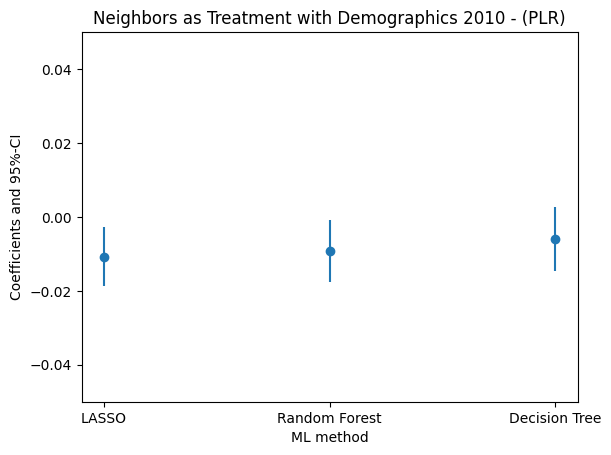

In [70]:
errors = np.full((2, plr_summary_n1_2010.shape[0]), np.nan)
errors[0, :] = plr_summary_n1_2010['coef'] - plr_summary_n1_2010['2.5 %']
errors[1, :] = plr_summary_n1_2010['97.5 %'] - plr_summary_n1_2010['coef']
plt.errorbar(plr_summary_n1_2010.index, plr_summary_n1_2010.coef, fmt='o', yerr=errors)
plt.ylim([-0.05, 0.05])

plt.title('Neighbors as Treatment with Demographics 2010 - (PLR)')
plt.xlabel('ML method')
_ =  plt.ylabel('Coefficients and 95%-CI')

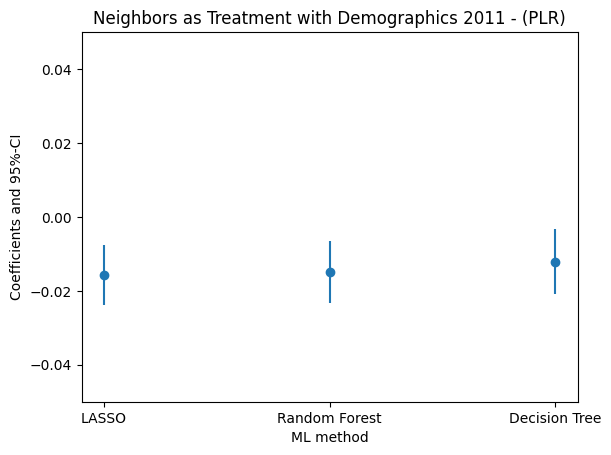

In [71]:
errors = np.full((2, plr_summary_n1_2011.shape[0]), np.nan)
errors[0, :] = plr_summary_n1_2011['coef'] - plr_summary_n1_2011['2.5 %']
errors[1, :] = plr_summary_n1_2011['97.5 %'] - plr_summary_n1_2011['coef']
plt.errorbar(plr_summary_n1_2011.index, plr_summary_n1_2011.coef, fmt='o', yerr=errors)
plt.ylim([-0.05, 0.05])

plt.title('Neighbors as Treatment with Demographics 2011 - (PLR)')
plt.xlabel('ML method')
_ =  plt.ylabel('Coefficients and 95%-CI')

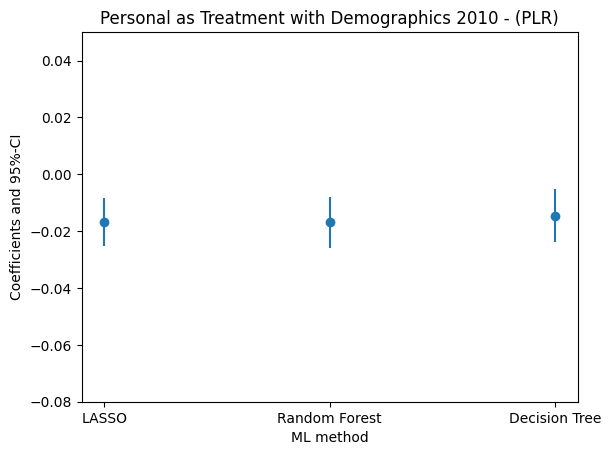

In [72]:
errors = np.full((2, plr_summary_p1_2010.shape[0]), np.nan)
errors[0, :] = plr_summary_p1_2010['coef'] - plr_summary_p1_2010['2.5 %']
errors[1, :] = plr_summary_p1_2010['97.5 %'] - plr_summary_p1_2010['coef']
plt.errorbar(plr_summary_p1_2010.index, plr_summary_p1_2010.coef, fmt='o', yerr=errors)
plt.ylim([-0.08, 0.05])

plt.title('Personal as Treatment with Demographics 2010 - (PLR)')
plt.xlabel('ML method')
_ =  plt.ylabel('Coefficients and 95%-CI')

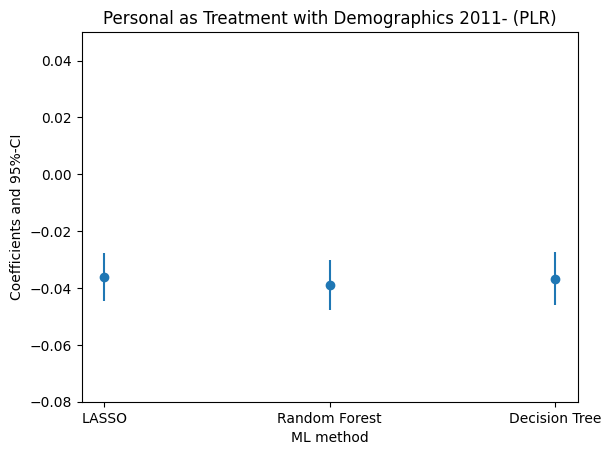

In [73]:
errors = np.full((2, plr_summary_p1_2011.shape[0]), np.nan)
errors[0, :] = plr_summary_p1_2011['coef'] - plr_summary_p1_2011['2.5 %']
errors[1, :] = plr_summary_p1_2011['97.5 %'] - plr_summary_p1_2011['coef']
plt.errorbar(plr_summary_p1_2011.index, plr_summary_p1_2011.coef, fmt='o', yerr=errors)
plt.ylim([-0.08, 0.05])

plt.title('Personal as Treatment with Demographics 2011- (PLR)')
plt.xlabel('ML method')
_ =  plt.ylabel('Coefficients and 95%-CI')

## Now with fixed effects

In [ ]:
np.random.seed(123)

# Initialize DoubleMLPLR model (partial linear regression model)
dml_plr_lasso_n2_2010 = dml.DoubleMLPLR(data_dml_base_n2_2010,
                                ml_l = lasso,
                                ml_m = lasso_class,
                                n_folds = 3)

dml_plr_lasso_n2_2010.fit(store_predictions=True)
summaryplrn2_2010 = dml_plr_lasso_n2_2010.summary

print(summaryplrn2_2010)


In [ ]:

np.random.seed(123)

# Initialize DoubleMLPLR model (partial linear regression model)
dml_plr_lasso_n2_2011 = dml.DoubleMLPLR(data_dml_base_n2_2011,
                                ml_l = lasso,
                                ml_m = lasso_class,
                                n_folds = 3)

dml_plr_lasso_n2_2011.fit(store_predictions=True)
summaryplrn2_2011 = dml_plr_lasso_n2_2011.summary

print(summaryplrn2_2011)



In [ ]:
np.random.seed(123)

# Initialize DoubleMLPLR model (partial linear regression model)
dml_plr_lasso_p2_2010 = dml.DoubleMLPLR(data_dml_base_p2_2010,
                                ml_l = lasso,
                                ml_m = lasso_class,
                                n_folds = 3)

dml_plr_lasso_p2_2010.fit(store_predictions=True)
summaryplrp2_2010 = dml_plr_lasso_p2_2010.summary

print(summaryplrp2_2010)



In [ ]:
np.random.seed(123)

# Initialize DoubleMLPLR model (partial linear regression model)
dml_plr_lasso_p2_2011 = dml.DoubleMLPLR(data_dml_base_p2_2011,
                                ml_l = lasso,
                                ml_m = lasso_class,
                                n_folds = 3)

dml_plr_lasso_p2_2011.fit(store_predictions=True)
summaryplrp2_2011 = dml_plr_lasso_p2_2011.summary

print(summaryplrp2_2011)



In [ ]:
np.random.seed(123)

dml_plr_forest_n2_2010 = dml.DoubleMLPLR(data_dml_base_n2_2010,
                                 ml_l = randomForest,
                                 ml_m = randomForest_class,
                                 n_folds = 3)

dml_plr_forest_n2_2010.fit(store_predictions=True)

forest_summary_n2_2010 = dml_plr_forest_n2_2010.summary

print(forest_summary_n2_2010)



In [ ]:
np.random.seed(123)

dml_plr_forest_n2_2011= dml.DoubleMLPLR(data_dml_base_n2_2011,
                                 ml_l = randomForest,
                                 ml_m = randomForest_class,
                                 n_folds = 3)

dml_plr_forest_n2_2011.fit(store_predictions=True)

forest_summary_n2_2011 = dml_plr_forest_n2_2011.summary

print(forest_summary_n2_2011)



In [ ]:
np.random.seed(123)

dml_plr_forest_p2_2010 = dml.DoubleMLPLR(data_dml_base_p2_2010,
                                 ml_l = randomForest,
                                 ml_m = randomForest_class,
                                 n_folds = 3)

dml_plr_forest_p2_2010.fit(store_predictions=True)

forest_summary_p2_2010 = dml_plr_forest_p2_2010.summary

print(forest_summary_p2_2010)



In [ ]:
np.random.seed(123)

dml_plr_forest_p2_2011 = dml.DoubleMLPLR(data_dml_base_p2_2011,
                                 ml_l = randomForest,
                                 ml_m = randomForest_class,
                                 n_folds = 3)

dml_plr_forest_p2_2011.fit(store_predictions=True)

forest_summary_p2_2011 = dml_plr_forest_p2_2011.summary

print(forest_summary_p2_2011)



In [ ]:
np.random.seed(123)

dml_plr_tree_n2_2010 = dml.DoubleMLPLR(data_dml_base_n2_2010,
                               ml_l = trees,
                               ml_m = trees_class,
                               n_folds = 3)

dml_plr_tree_n2_2010.fit(store_predictions=True)
tree_summary_n2_2010 = dml_plr_tree_n2_2010.summary

print(tree_summary_n2_2010)



In [ ]:
np.random.seed(123)

dml_plr_tree_n2_2011 = dml.DoubleMLPLR(data_dml_base_n2_2011,
                               ml_l = trees,
                               ml_m = trees_class,
                               n_folds = 3)

dml_plr_tree_n2_2011.fit(store_predictions=True)
tree_summary_n2_2011 = dml_plr_tree_n2_2011.summary

print(tree_summary_n2_2011)



In [ ]:
np.random.seed(123)

dml_plr_tree_p2_2010 = dml.DoubleMLPLR(data_dml_base_p2_2010,
                               ml_l = trees,
                               ml_m = trees_class,
                               n_folds = 3)

dml_plr_tree_p2_2010.fit(store_predictions=True)
tree_summary_p2_2010 = dml_plr_tree_p2_2010.summary

print(tree_summary_p2_2010)



In [ ]:
np.random.seed(123)

dml_plr_tree_p2_2011 = dml.DoubleMLPLR(data_dml_base_p2_2011,
                               ml_l = trees,
                               ml_m = trees_class,
                               n_folds = 3)

dml_plr_tree_p2_2011.fit(store_predictions=True)
tree_summary_p2_2011 = dml_plr_tree_p2_2011.summary

print(tree_summary_p2_2011)

In [ ]:
plr_summary_p2_2010 = pd.concat((summaryplrp2_2010,forest_summary_p2_2010,tree_summary_p2_2010 )) 
plr_summary_p2_2010.index = ['LASSO', 'Random Forest', 'Decision Tree']

plr_summary_p2_2011 = pd.concat((summaryplrp2_2011,forest_summary_p2_2011,tree_summary_p2_2011 )) 
plr_summary_p2_2011.index = ['LASSO', 'Random Forest', 'Decision Tree']


plr_summary_n2_2010 = pd.concat((summaryplrn2_2010,forest_summary_n2_2010,tree_summary_n2_2010 )) 
plr_summary_n2_2010.index = ['LASSO', 'Random Forest', 'Decision Tree']

plr_summary_n2_2011 = pd.concat((summaryplrn2_2011,forest_summary_n2_2011,tree_summary_n2_2011 )) 
plr_summary_n2_2011.index = ['LASSO', 'Random Forest', 'Decision Tree']


In [ ]:
errors = np.full((2, plr_summary_n2_2010.shape[0]), np.nan)
errors[0, :] = plr_summary_n2_2010['coef'] - plr_summary_n2_2010['2.5 %']
errors[1, :] = plr_summary_n2_2010['97.5 %'] - plr_summary_n2_2010['coef']
plt.errorbar(plr_summary_n2_2010.index, plr_summary_n2_2010.coef, fmt='o', yerr=errors)
plt.ylim([-0.05, 0.05])

plt.title('Neighbors as Treatment with Demographics and Fixed Effects 2010 - (PLR)')
plt.xlabel('ML method')
_ =  plt.ylabel('Coefficients and 95%-CI')

In [ ]:
errors = np.full((2, plr_summary_n2_2011.shape[0]), np.nan)
errors[0, :] = plr_summary_n2_2011['coef'] - plr_summary_n2_2011['2.5 %']
errors[1, :] = plr_summary_n2_2011['97.5 %'] - plr_summary_n2_2011['coef']
plt.errorbar(plr_summary_n2_2011.index, plr_summary_n2_2011.coef, fmt='o', yerr=errors)
plt.ylim([-0.05, 0.05])

plt.title('Neighbors as Treatment with Demographics and Fixed Effects 2011 - (PLR)')
plt.xlabel('ML method')
_ =  plt.ylabel('Coefficients and 95%-CI')

In [ ]:
errors = np.full((2, plr_summary_p2_2010.shape[0]), np.nan)
errors[0, :] = plr_summary_p2_2010['coef'] - plr_summary_p2_2010['2.5 %']
errors[1, :] = plr_summary_p2_2010['97.5 %'] - plr_summary_p2_2010['coef']
plt.errorbar(plr_summary_p2_2010.index, plr_summary_p2_2010.coef, fmt='o', yerr=errors)
plt.ylim([-0.08, 0.05])

plt.title('Personal as Treatment with Demographics and Fixed Effects 2010- (PLR)')
plt.xlabel('ML method')
_ =  plt.ylabel('Coefficients and 95%-CI')

In [ ]:
errors = np.full((2, plr_summary_p2_2011.shape[0]), np.nan)
errors[0, :] = plr_summary_p2_2011['coef'] - plr_summary_p2_2011['2.5 %']
errors[1, :] = plr_summary_p2_2011['97.5 %'] - plr_summary_p2_2011['coef']
plt.errorbar(plr_summary_p2_2011.index, plr_summary_p2_2011.coef, fmt='o', yerr=errors)
plt.ylim([-0.08, 0.05])

plt.title('Personal as Treatment with Demographics and Fixed Effects 2011- (PLR)')
plt.xlabel('ML method')
_ =  plt.ylabel('Coefficients and 95%-CI')